In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
# Accesses data from csv file separated by ';'
# Randomises using the seed 42
data = pd.read_csv("student-mat.csv", delimiter=";")
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Categorical columns take discrete values but aren not binary.
# This one hot encodes the data.The rest of the data is considered numerical.
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_binary_cols = data.select_dtypes(exclude=['object']).columns

# pd.get_dummies() Does the one hot encoding to the categorical columns
# Then concatenates the one hot encoded onto the numerical ones.
df_categorical_dummies = pd.get_dummies(data[categorical_cols])
df_final = pd.concat([data[numerical_binary_cols], df_categorical_dummies], axis=1)

data = df_final


In [114]:
m, n = data.shape
# This is the training data.
x_train = data[:int(0.6*m)]
y_train = x_train["G3"]

# This is the testing data.
x_test = data[int(0.6*m):int(0.8*m)]
y_test = x_test["G3"]

# This is the cross validation data.
x_cv = data[int(0.8*m):]
y_cv = x_cv["G3"]

# Removing the answers from training & testing data.
# These are the features we are removing and of course the actual values G3.
lst = ["age", 
	   "Medu", 
	   "Fedu",
		"traveltime",
		"famrel",
		"freetime",
		"goout",
		"health",
		"G3",
		"romantic_no",
		"sex_F",
		"school_GP",
		"address_R",
		"famsize_GT3",
		"Pstatus_A",
		"schoolsup_no",
		"paid_no",
		"activities_no",
		"nursery_no",
		"higher_no",
		"internet_no",
		"Dalc",
		"Walc",
		"school_MS",
		"address_U",
		"address_R",
		"activities_yes",
		"nursery_yes",
		"romantic_yes",
		"Mjob_at_home",
		"Mjob_health",
		"Mjob_other",
		"Mjob_services",
		"Mjob_teacher",
		"Fjob_at_home",
		"Fjob_health",
		"Fjob_other",
		"Fjob_services",
		"Fjob_teacher",
		"guardian_father",
		"guardian_mother",
		"guardian_other",
		"famsup_no",
		"Pstatus_T",
		"famsize_LE3",
		"absences",
		"reason_home",
		"reason_course",
		"reason_other"
		# "reason_reputation",
		# "internet_yes",
		# "higher_yes",
		# "paid_yes",
		# "famsup_yes",
		# "sex_M",
		# "schoolsup_yes",
		# "failures",
		# "studytime"
		
		]
# Removes all features in lst.
x_train = x_train.drop(columns=lst)
x_test = x_test.drop(columns=lst)
x_cv = x_cv.drop(columns=lst)


x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_cv_np = x_cv.to_numpy()
y_cv_np = y_cv.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

m, n = x_train_np.shape

# Defining initial parameters
W = np.full((n), 1)
b = 1


In [115]:
# Display the remaining columns in the training data
remaining_features = x_train.columns.tolist()
print(remaining_features)

['studytime', 'failures', 'G1', 'G2', 'sex_M', 'reason_reputation', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'higher_yes', 'internet_yes']


Here we will try and fix the issue of overfitting by reducing the number of features.

In [116]:
# Feature scaling

x_train_np = (x_train_np - np.mean(x_train_np, axis=0)) / np.std(x_train_np, axis=0)

In [117]:
print("Shape of data:", data.shape,"\n")

print("Shape of training data:", x_train.shape)
print("shape of training actual final grades:", y_train.shape, "\n")

print("shape of Cross Validation examples:", x_cv.shape)
print("shape of Cross Validation examples final grades", y_cv.shape)

print("shape of Testing examples:", x_test.shape)
print("shape of Testing examples final grades", y_test.shape, "\n")

Shape of data: (395, 59) 

Shape of training data: (237, 11)
shape of training actual final grades: (237,) 

shape of Cross Validation examples: (79, 11)
shape of Cross Validation examples final grades (79,)
shape of Testing examples: (79, 11)
shape of Testing examples final grades (79,) 



In [118]:
def f_wb(x, W, b):
	return np.matmul(x,W) + b

In [119]:
# Cost function with Regularisation parameter
def cost_function(x, y, W, b, lambda_):
	#print(f_wb(x,W,b)- y)
	m, n = x.shape
	cost = np.sum((f_wb(x, W, b) - y)**2, axis=0) + (np.sum(W**2, axis=0) * (lambda_ / 2*m))
	return cost / (2*m)


In [120]:
# In order to modify the regularisation parameter lambda change it here and in the cost function.

epoch_history = []
cost_history = []
def gradient_descent(x,y,W,b, lambda_):
	learning_rate = 0.1
	m,n = x.shape
	
	dJ_dW = 0
	dJ_db = 0
	# Contains regularisation parameter
	dJ_dW = (np.sum((f_wb(x, W, b) - y).reshape(-1, 1) * x, axis=0) / m) + np.sum(W, axis=0) * (lambda_ /m)
	dJ_db = (np.sum((f_wb(x, W,b) - y), axis=0)) / m

	W = W - (learning_rate*dJ_dW)
	b = b - (learning_rate*dJ_db)

	return W, b

In [121]:
lambda_ = 1
x = x_train_np
y = y_train_np

for epochs in range(10001):
	W, b = gradient_descent(x, y, W , b, lambda_)
	
	cost = cost_function(x, y, W, b, lambda_)
	if epochs % 500 == 0:
		epoch_history.append(epochs)
		cost_history.append(cost)
		print(f"Iteration {epochs} the cost is: {cost:.5f}")

Iteration 0 the cost is: 44.40763
Iteration 500 the cost is: 5.02442
Iteration 1000 the cost is: 5.03753
Iteration 1500 the cost is: 5.03760
Iteration 2000 the cost is: 5.03760
Iteration 2500 the cost is: 5.03760
Iteration 3000 the cost is: 5.03760
Iteration 3500 the cost is: 5.03760
Iteration 4000 the cost is: 5.03760
Iteration 4500 the cost is: 5.03760
Iteration 5000 the cost is: 5.03760
Iteration 5500 the cost is: 5.03760
Iteration 6000 the cost is: 5.03760
Iteration 6500 the cost is: 5.03760
Iteration 7000 the cost is: 5.03760
Iteration 7500 the cost is: 5.03760
Iteration 8000 the cost is: 5.03760
Iteration 8500 the cost is: 5.03760
Iteration 9000 the cost is: 5.03760
Iteration 9500 the cost is: 5.03760
Iteration 10000 the cost is: 5.03760


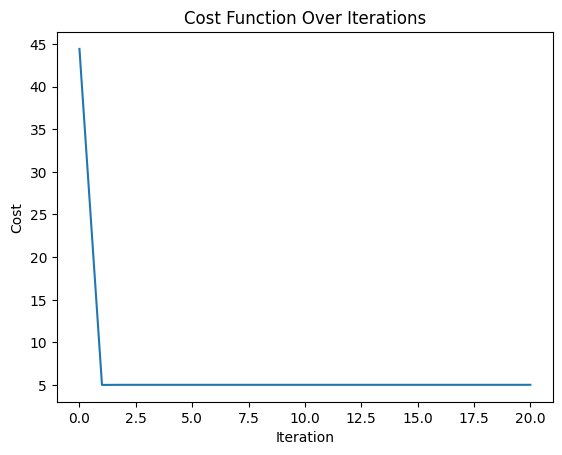

In [122]:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

In [123]:
def check_train(i):
	print(f"Predicted {f_wb(x_train_np[i], W, b)}")
	print(f"Actual {y_train_np[i]}")


def check_cv(i):
	print(f"Predicted: {f_wb(x_cv_np[i], W, b) % 20:.2f}")
	print(f"Actual: {y_cv_np[i]}")


for i in range(10,20):
	check_cv(i)

Predicted: 3.42
Actual: 11
Predicted: 14.92
Actual: 8
Predicted: 18.91
Actual: 13
Predicted: 12.34
Actual: 10
Predicted: 7.36
Actual: 0
Predicted: 14.67
Actual: 11
Predicted: 10.57
Actual: 11
Predicted: 10.73
Actual: 6
Predicted: 18.96
Actual: 7
Predicted: 18.91
Actual: 12


In [124]:
def costs():
	j_train = cost_function(x_train_np, y_train_np, W, b, lambda_)
	j_cv = cost_function(x_cv_np, y_cv_np, W, b, lambda_)
	print("j_train is:", j_train)
	print("j_cv is:", j_cv)
	print(f"Scale larger: {round(j_cv/j_train)}")

costs()

j_train is: 5.037599872166121
j_cv is: 1005.8837649779936
Scale larger: 200


<function matplotlib.pyplot.show(close=None, block=None)>

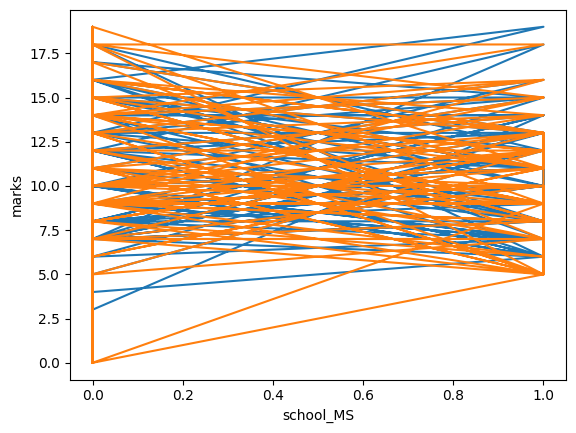

In [125]:
var = "school_MS"

plt.plot(data[var], data["G1"], label="G1")
plt.show
plt.plot(data[var], data["G2"], label="G2")

plt.xlabel(var)
plt.ylabel("marks")
plt.show


In [126]:
print(x_train.iloc[0][25:])
#print(x_train.shape)

Series([], Name: 0, dtype: int64)


Which ones to remove:
age
medu 
fedu
travel time
famrel
freetime
goout
health